1
2
3
k=1, Train Accuracy=1.0000, Test Accuracy=0.9691
k=2, Train Accuracy=0.9857, Test Accuracy=0.9627
k=3, Train Accuracy=0.9867, Test Accuracy=0.9705


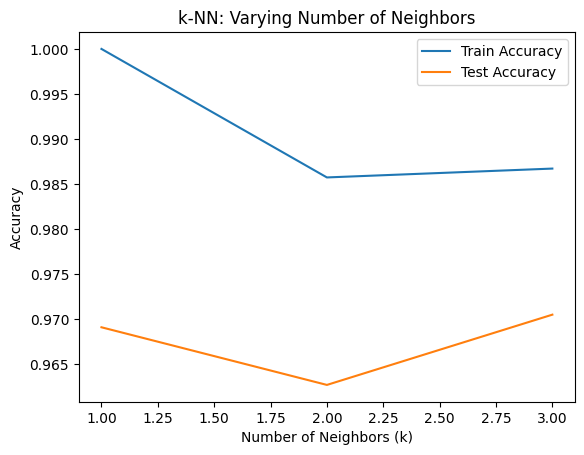

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Change dtype of values in x_train and x_test to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize x_train and x_test in range of [0; 1]
x_train /= 255
x_test /= 255

# Initialize lists to save accuracy values
train_accuracies = []
test_accuracies = []

for k in range(1, 4):
    print(k)
    # Initialize model with new k value
    model = kNNClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
    
    # Fit model
    model.fit(x_train, y_train)
    
    # Predict training subset
    y_train_pred = model.predict(x_train)
    
    # Predict testing subset
    y_test_pred = model.predict(x_test)
    
    # Calculate model's accuracy for training subset
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Save accuracy_train
    train_accuracies.append(accuracy_train)
    
    # Calculate model's accuracy for testing subset
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    # Save accuracy_test
    test_accuracies.append(accuracy_test)

# Print the accuracies for each k value
for k in range(1, 4):
    print(f'k={k}, Train Accuracy={train_accuracies[k-1]:.4f}, Test Accuracy={test_accuracies[k-1]:.4f}')

# Plot the accuracies
plt.plot(range(1, 4), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 4), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('k-NN: Varying Number of Neighbors')
plt.show()
